### Imports

In [1]:
#imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from copy import deepcopy
from sklearn.metrics import confusion_matrix
import time

### Read/Transform Data

In [2]:
def cropImage(test_img):
    left = test_img.shape[1]
    right = 0
    up = test_img.shape[0]
    down = 0
    for i in range(0, test_img.shape[0], 10):
        for j in range(0, test_img.shape[1], 10):
            if test_img[i][j]<128:
                if i>down:
                    down = i
                if i<up:
                    up=i
                if j>right:
                    right = j
                if j<left:
                    left = j
    
    return test_img[up:down, left:right]

In [3]:
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
              'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f',
              'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

IMG_SIZE = 32
NUM_IMAGES_BY_CLASS = 55
NUM_CLASSES = len(CATEGORIES)

filenames=dict()
for character in CATEGORIES:
    filenames[character] = []    

with open("english.csv") as csv_file:
    csv_file.readline()
    for row in csv_file:
        name, category = row.strip().split(',')
        filenames[category].append(name)

def read_data(begin, end):
    data = []
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        for filename in filenames[category][int(begin*NUM_IMAGES_BY_CLASS):int(end*NUM_IMAGES_BY_CLASS)]:
            try:
                #read in grayscale to have less data
                #with cropping
                img_array = cropImage(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))
                
                #without cropping
                #img_array = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
                
                #resize to be smaller to have less data
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                #normalize data
                new_array = new_array/255.0
                
                data.append([new_array, class_num])

            except Exception as e:
                print("Error")
    
    return data

In [4]:
#shuffle the training data so the neural network learns better
cv1_data = read_data(0.0, 0.2)
cv2_data = read_data(0.2, 0.4)
cv3_data = read_data(0.4, 0.6)
cv4_data = read_data(0.6, 0.8)
random.shuffle(cv1_data)
random.shuffle(cv2_data)
random.shuffle(cv3_data)
random.shuffle(cv4_data)
test_data = read_data(0.8, 1.0)

In [5]:
X_cv1 = []
y_cv1 = []
for features, label in cv1_data:
    X_cv1.append(features)
    y_cv1.append(label)

X_cv2 = []
y_cv2 = []
for features, label in cv2_data:
    X_cv2.append(features)
    y_cv2.append(label)

X_cv3 = []
y_cv3 = []
for features, label in cv3_data:
    X_cv3.append(features)
    y_cv3.append(label)

X_cv4 = []
y_cv4 = []
for features, label in cv4_data:
    X_cv4.append(features)
    y_cv4.append(label)

X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_cv1 = np.array(X_cv1).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_cv2 = np.array(X_cv2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_cv3 = np.array(X_cv3).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_cv4 = np.array(X_cv4).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

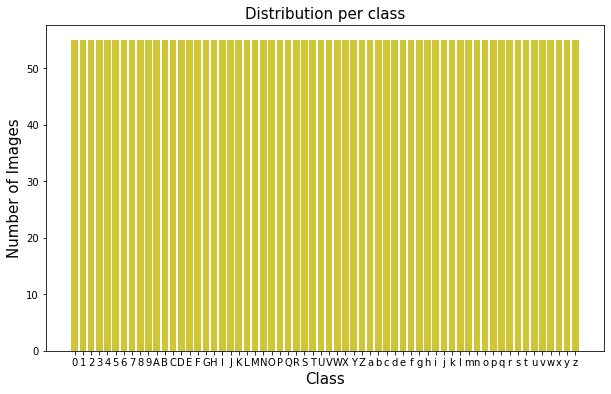

In [6]:
plt.figure(figsize = (10,6))
plt.bar(CATEGORIES, [len(filenames[category]) for category in CATEGORIES] , color="#cec635")
plt.xlabel('Class',fontsize=15)
plt.ylabel('Number of Images',fontsize=15)
plt.title('Distribution per class',fontsize=15)
plt.show()

### Save/Load Data

In [7]:
pickle_out = open("X_cv1.pickle", "wb")
pickle.dump(X_cv1, pickle_out)
pickle_out.close()

pickle_out = open("y_cv1.pickle", "wb")
pickle.dump(y_cv1, pickle_out)
pickle_out.close()

pickle_out = open("X_cv2.pickle", "wb")
pickle.dump(X_cv2, pickle_out)
pickle_out.close()

pickle_out = open("y_cv2.pickle", "wb")
pickle.dump(y_cv2, pickle_out)
pickle_out.close()

pickle_out = open("X_cv3.pickle", "wb")
pickle.dump(X_cv3, pickle_out)
pickle_out.close()

pickle_out = open("y_cv3.pickle", "wb")
pickle.dump(y_cv3, pickle_out)
pickle_out.close()

pickle_out = open("X_cv4.pickle", "wb")
pickle.dump(X_cv4, pickle_out)
pickle_out.close()

pickle_out = open("y_cv4.pickle", "wb")
pickle.dump(y_cv4, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [8]:
#read data
X_cv1 = np.array(pickle.load(open("X_cv1.pickle", "rb")))
y_cv1 = np.array(pickle.load(open("y_cv1.pickle", "rb")))
X_cv2 = np.array(pickle.load(open("X_cv2.pickle", "rb")))
y_cv2 = np.array(pickle.load(open("y_cv2.pickle", "rb")))
X_cv3 = np.array(pickle.load(open("X_cv3.pickle", "rb")))
y_cv3 = np.array(pickle.load(open("y_cv3.pickle", "rb")))
X_cv4 = np.array(pickle.load(open("X_cv4.pickle", "rb")))
y_cv4 = np.array(pickle.load(open("y_cv4.pickle", "rb")))

X_test = np.array(pickle.load(open("X_test.pickle", "rb")))
y_test = np.array(pickle.load(open("y_test.pickle", "rb")))

### Models

In [9]:
#kaggle
def model3Conv(shape, kernel_size=2):
    #create model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=kernel_size,activation="relu", input_shape=shape))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=32, kernel_size=kernel_size,activation="relu"))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=32, kernel_size=kernel_size,activation="relu"))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Flatten())

    model.add(Dense(units=512, activation="relu"))
    model.add(Dense(units=62, activation="sigmoid"))
    
    return model

In [10]:
#artigo IEEE
def model2Conv(shape, kernel_size=4, dropout=0.6):
    #create model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=kernel_size,activation="relu", input_shape=shape))
    model.add(Conv2D(filters=32, kernel_size=kernel_size,activation="relu"))
    
    model.add(MaxPooling2D(2,2))
    
    model.add(Dropout(dropout))
    model.add(Dropout(dropout))
    
    model.add(Flatten())

    model.add(Dense(units=512, activation="relu"))
    model.add(Dense(units=512, activation="relu"))
    model.add(Dense(units=62, activation="sigmoid"))
    
    return model

In [11]:
def cross_validation3Conv(learning_rate=0.001, kernel_size=2):
    X_train = np.concatenate((X_cv2, X_cv3))
    X_train = np.concatenate((X_train, X_cv4))
    X_val = X_cv1
    y_train = np.concatenate((y_cv2, y_cv3))
    y_train = np.concatenate((y_train, y_cv4))
    y_val = y_cv1
    
    model1 = model3Conv(X_train.shape[1:], kernel_size)
    model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results1 = model1.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)

    X_train = np.concatenate((X_cv1, X_cv3))
    X_train = np.concatenate((X_train, X_cv4))
    X_val = X_cv2
    y_train = np.concatenate((y_cv1, y_cv3))
    y_train = np.concatenate((y_train, y_cv4))
    y_val = y_cv2
    
    model2 = model3Conv(X_train.shape[1:], kernel_size)
    model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results2 = model2.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)
    
    X_train = np.concatenate((X_cv1, X_cv2))
    X_train = np.concatenate((X_train, X_cv4))
    X_val = X_cv3
    y_train = np.concatenate((y_cv1, y_cv2))
    y_train = np.concatenate((y_train, y_cv4))
    y_val = y_cv3
    
    model3 = model3Conv(X_train.shape[1:], kernel_size)
    model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results3 = model3.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)

    X_train = np.concatenate((X_cv1, X_cv2))
    X_train = np.concatenate((X_train, X_cv3))
    X_val = X_cv4
    y_train = np.concatenate((y_cv1, y_cv2))
    y_train = np.concatenate((y_train, y_cv3))
    y_val = y_cv4
    
    model4 = model3Conv(X_train.shape[1:], kernel_size)
    model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results4 = model4.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)
    
    return results1, results2, results3, results4

In [12]:
def cross_validation2Conv(learning_rate=0.001, kernel_size=4, dropout=0.6):
    X_train = np.concatenate((X_cv2, X_cv3))
    X_train = np.concatenate((X_train, X_cv4))
    X_val = X_cv1
    y_train = np.concatenate((y_cv2, y_cv3))
    y_train = np.concatenate((y_train, y_cv4))
    y_val = y_cv1
    
    model1 = model2Conv(X_train.shape[1:], kernel_size=kernel_size, dropout=dropout)
    model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results1 = model1.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)

    X_train = np.concatenate((X_cv1, X_cv3))
    X_train = np.concatenate((X_train, X_cv4))
    X_val = X_cv2
    y_train = np.concatenate((y_cv1, y_cv3))
    y_train = np.concatenate((y_train, y_cv4))
    y_val = y_cv2
    
    model2 = model2Conv(X_train.shape[1:], kernel_size=kernel_size, dropout=dropout)
    model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results2 = model2.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)
    
    X_train = np.concatenate((X_cv1, X_cv2))
    X_train = np.concatenate((X_train, X_cv4))
    X_val = X_cv3
    y_train = np.concatenate((y_cv1, y_cv2))
    y_train = np.concatenate((y_train, y_cv4))
    y_val = y_cv3
    
    model3 = model2Conv(X_train.shape[1:], kernel_size=kernel_size, dropout=dropout)
    model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results3 = model3.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)

    X_train = np.concatenate((X_cv1, X_cv2))
    X_train = np.concatenate((X_train, X_cv3))
    X_val = X_cv4
    y_train = np.concatenate((y_cv1, y_cv2))
    y_train = np.concatenate((y_train, y_cv3))
    y_val = y_cv4
    
    model4 = model2Conv(X_train.shape[1:], kernel_size=kernel_size, dropout=dropout)
    model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   metrics=['accuracy'])
    results4 = model4.fit(X_train, keras.utils.to_categorical(y_train, 62),
                          validation_data=(X_val, keras.utils.to_categorical(y_val, 62)), epochs=10)
    
    return results1, results2, results3, results4

In [44]:
def plot_acc_valacc(r1, r2, r3, r4):
    results_acc = []
    results_val_acc = []
    for i in range(10):
        #get the med value
        acc = (r1.history['accuracy'][i] + r2.history['accuracy'][i] + r3.history['accuracy'][i] + r4.history['accuracy'][i])/4
        val_acc = (r1.history['val_accuracy'][i] + r2.history['val_accuracy'][i] + r3.history['val_accuracy'][i] + r4.history['val_accuracy'][i])/4

        #adding to array
        results_acc.append(acc)
        results_val_acc.append(val_acc)

    print(results_val_acc)
    plt.figure(figsize = (18,7))
    plt.plot(range(10), results_acc, color="#cec635")
    plt.plot(range(10), results_val_acc, color="#da2700")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.title("Training/Validation Accuracy Comparison")
    plt.show()

In [45]:
def plot_loss_valloss(r1, r2, r3, r4):
    results_loss = []
    results_val_loss = []
    for i in range(10):
        #get the med value
        loss = (r1.history['loss'][i] + r2.history['loss'][i] + r3.history['loss'][i] + r4.history['loss'][i])/4
        val_loss = (r1.history['val_loss'][i] + r2.history['val_loss'][i] + r3.history['val_loss'][i] + r4.history['val_loss'][i])/4

        #adding to array
        results_loss.append(loss)
        results_val_loss.append(val_loss)

    print(results_val_loss)
    plt.figure(figsize = (18,7))
    plt.plot(range(10), results_loss, color="#cec635")
    plt.plot(range(10), results_val_loss, color="#da2700")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.title("Training/Validation Loss Comparison")
    plt.show()

#### Model with 3 Convolutional Layers

In [48]:
r1, r2, r3, r4 = cross_validation3Conv()

Epoch 1/10
64/64 [==============================] - 2s 23ms/step - loss: 3.6462 - accuracy: 0.1530 - val_loss: 2.2969 - val_accuracy: 0.3783
Epoch 2/10
64/64 [==============================] - 1s 18ms/step - loss: 1.3614 - accuracy: 0.6217 - val_loss: 1.3739 - val_accuracy: 0.6070
Epoch 3/10
64/64 [==============================] - 1s 18ms/step - loss: 0.7492 - accuracy: 0.7771 - val_loss: 1.2546 - val_accuracy: 0.6393
Epoch 4/10
64/64 [==============================] - 1s 18ms/step - loss: 0.5206 - accuracy: 0.8319 - val_loss: 1.1126 - val_accuracy: 0.6935
Epoch 5/10
64/64 [==============================] - 1s 21ms/step - loss: 0.3867 - accuracy: 0.8734 - val_loss: 1.0809 - val_accuracy: 0.7097
Epoch 6/10
64/64 [==============================] - 1s 18ms/step - loss: 0.2770 - accuracy: 0.9115 - val_loss: 1.3456 - val_accuracy: 0.6848
Epoch 7/10
64/64 [==============================] - 1s 20ms/step - loss: 0.2567 - accuracy: 0.9164 - val_loss: 1.1767 - val_accuracy: 0.6965
Epoch 8/10
64

[0.4178885594010353, 0.6601906269788742, 0.7148093730211258, 0.7349706739187241, 0.7525659799575806, 0.7540322691202164, 0.7624633461236954, 0.7690615803003311, 0.7741935402154922, 0.7815249264240265]


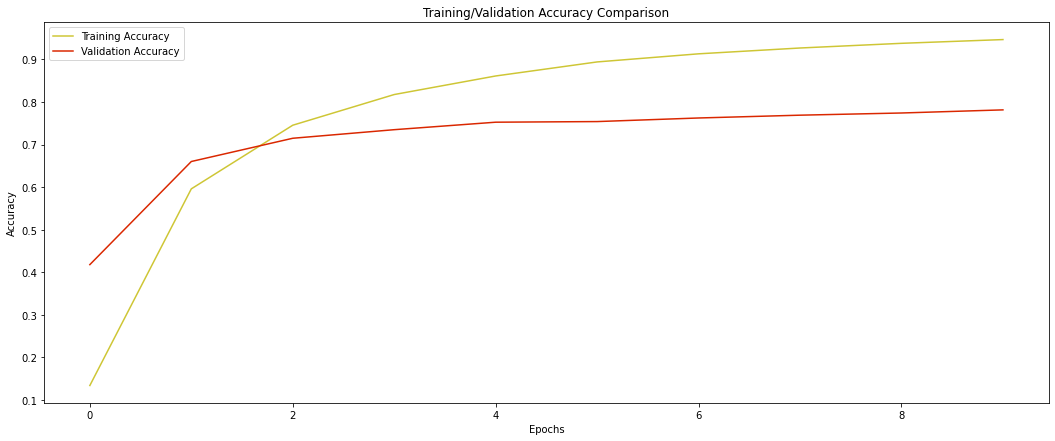

In [49]:
plot_acc_valacc(r1, r2, r3, r4)

[2.2828694581985474, 1.1551122963428497, 0.9693069159984589, 0.9011346995830536, 0.8375918567180634, 0.8900176733732224, 0.8528642505407333, 0.8920793533325195, 0.8670293837785721, 0.8673150539398193]


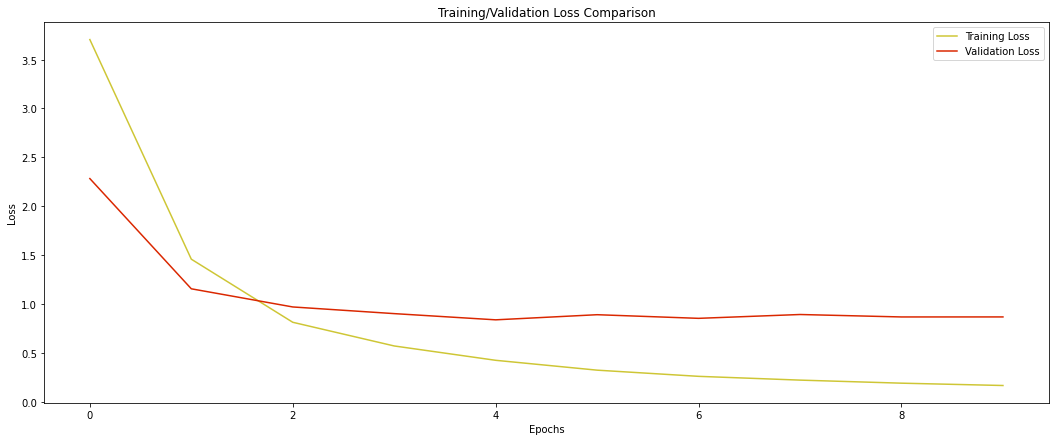

In [50]:
plot_loss_valloss(r1, r2, r3, r4)

In [51]:
X_train = np.concatenate((X_cv1, X_cv2))
X_train = np.concatenate((X_train, X_cv3))
X_train = np.concatenate((X_train, X_cv4))
y_train = np.concatenate((y_cv1, y_cv2))
y_train = np.concatenate((y_train, y_cv3))
y_train = np.concatenate((y_train, y_cv4))

model = model3Conv(X_train.shape[1:])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),
                   metrics=['accuracy'])

results = model.fit(X_train, keras.utils.to_categorical(y_train, 62), epochs=10)
test_loss, test_acc = model.evaluate(X_test,keras.utils.to_categorical(y_test, 62))
print(test_loss)
print(test_acc)

Epoch 1/10
86/86 [==============================] - 2s 17ms/step - loss: 3.2422 - accuracy: 0.2207
Epoch 2/10
86/86 [==============================] - 1s 17ms/step - loss: 1.0844 - accuracy: 0.6902
Epoch 3/10
86/86 [==============================] - 1s 17ms/step - loss: 0.6759 - accuracy: 0.7944 0s - loss: 0.6747 - accuracy
Epoch 4/10
86/86 [==============================] - 2s 18ms/step - loss: 0.5012 - accuracy: 0.8358
Epoch 5/10
86/86 [==============================] - 1s 15ms/step - loss: 0.3748 - accuracy: 0.8834
Epoch 6/10
86/86 [==============================] - 1s 15ms/step - loss: 0.3327 - accuracy: 0.8915
Epoch 7/10
86/86 [==============================] - 1s 15ms/step - loss: 0.2450 - accuracy: 0.9205
Epoch 8/10
86/86 [==============================] - 1s 15ms/step - loss: 0.1978 - accuracy: 0.9348
Epoch 9/10
86/86 [==============================] - 1s 15ms/step - loss: 0.1832 - accuracy: 0.9373
Epoch 10/10
22/22 [==============================] - 0s 5ms/step - loss: 0.9538 

Text(0.5, 1.0, 'Category')

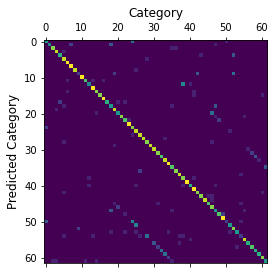

In [52]:
y_pred = model.predict_classes(X_test)

#Absolute matrix (number of guesses)
confMatrix = confusion_matrix(y_test, y_pred)
plt.matshow(confMatrix)
plt.ylabel('Predicted Category', fontsize=12)
plt.title('Category', fontsize=12)

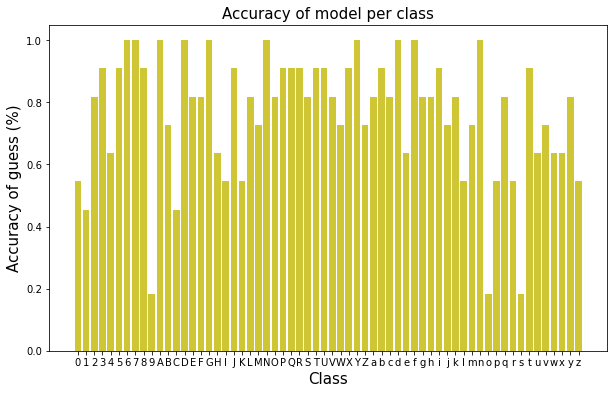

In [53]:
accGraph = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (10,6))
plt.bar(CATEGORIES, [accGraph[i][i] for i in range(62)], color="#cec635")
plt.xlabel('Class',fontsize=15)
plt.ylabel('Accuracy of guess (%)',fontsize=15)
plt.title('Accuracy of model per class',fontsize=15)
plt.show()

#### Model with 2 Convolutional Layers

In [54]:
r1, r2, r3, r4 = cross_validation2Conv()

Epoch 1/10
64/64 [==============================] - 6s 81ms/step - loss: 3.3133 - accuracy: 0.1828 - val_loss: 1.8848 - val_accuracy: 0.4868
Epoch 2/10
64/64 [==============================] - 5s 78ms/step - loss: 1.2524 - accuracy: 0.6339 - val_loss: 1.4091 - val_accuracy: 0.5850
Epoch 3/10
64/64 [==============================] - 5s 78ms/step - loss: 0.8056 - accuracy: 0.7576 - val_loss: 1.1050 - val_accuracy: 0.6789
Epoch 4/10
64/64 [==============================] - 5s 78ms/step - loss: 0.5992 - accuracy: 0.8074 - val_loss: 1.0259 - val_accuracy: 0.7009
Epoch 5/10
64/64 [==============================] - 6s 91ms/step - loss: 0.4577 - accuracy: 0.8500 - val_loss: 0.9710 - val_accuracy: 0.6994
Epoch 6/10
64/64 [==============================] - 7s 102ms/step - loss: 0.3796 - accuracy: 0.8700 - val_loss: 1.0322 - val_accuracy: 0.7126
Epoch 7/10
64/64 [==============================] - 6s 86ms/step - loss: 0.3228 - accuracy: 0.8856 - val_loss: 0.9542 - val_accuracy: 0.7361
Epoch 8/10
6

[0.5289589539170265, 0.6818181723356247, 0.7331378310918808, 0.7437683343887329, 0.7624633461236954, 0.767961859703064, 0.7712610065937042, 0.7756598144769669, 0.7888563126325607, 0.7796920835971832]


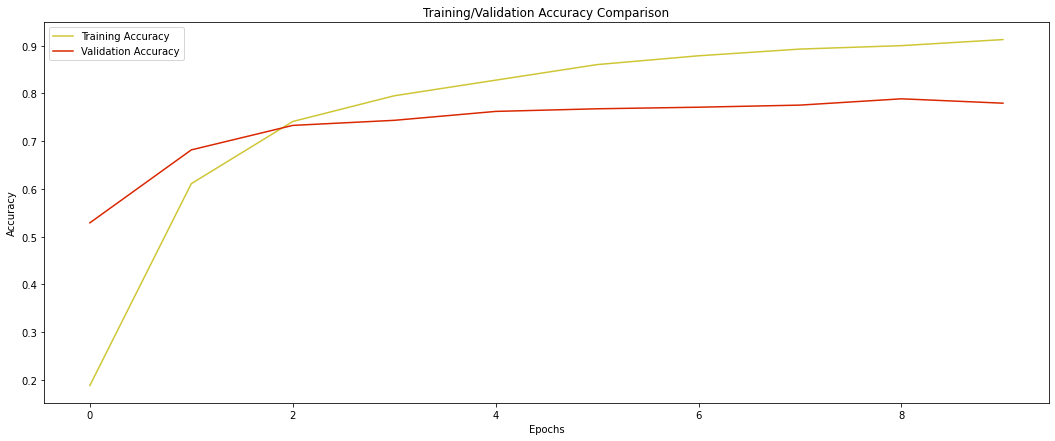

In [55]:
plot_acc_valacc(r1, r2, r3, r4)

[1.7712331116199493, 1.1042233258485794, 0.8969644159078598, 0.8517297506332397, 0.8008555322885513, 0.8271036893129349, 0.8034752458333969, 0.7715528607368469, 0.7461747080087662, 0.8269262760877609]


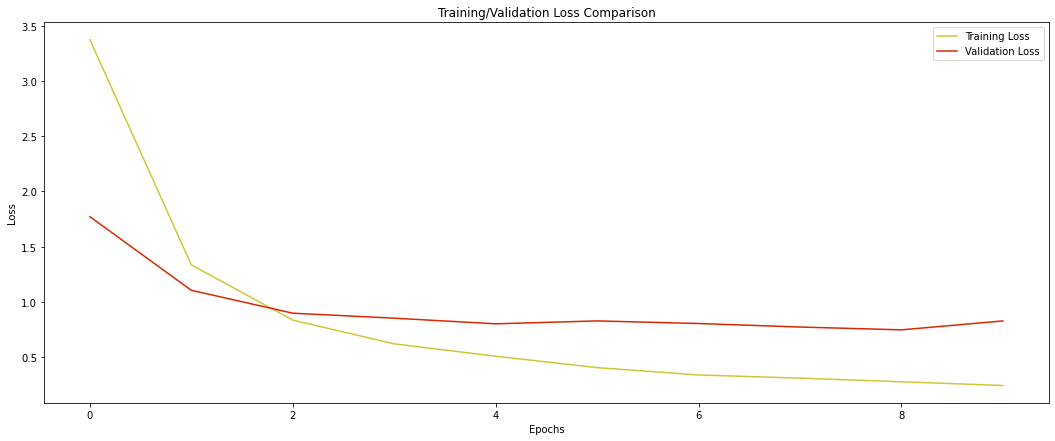

In [56]:
plot_loss_valloss(r1, r2, r3, r4)

In [57]:
X_train = np.concatenate((X_cv1, X_cv2))
X_train = np.concatenate((X_train, X_cv3))
X_train = np.concatenate((X_train, X_cv4))
y_train = np.concatenate((y_cv1, y_cv2))
y_train = np.concatenate((y_train, y_cv3))
y_train = np.concatenate((y_train, y_cv4))

model = model2Conv(X_train.shape[1:])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),
                   metrics=['accuracy'])

results = model.fit(X_train, keras.utils.to_categorical(y_train, 62), epochs=10)
test_loss, test_acc = model.evaluate(X_test,keras.utils.to_categorical(y_test, 62))
print(test_loss)
print(test_acc)

Epoch 1/10
86/86 [==============================] - 7s 71ms/step - loss: 2.9009 - accuracy: 0.2944
Epoch 2/10
86/86 [==============================] - 6s 68ms/step - loss: 1.0796 - accuracy: 0.6752
Epoch 3/10
86/86 [==============================] - 6s 67ms/step - loss: 0.6801 - accuracy: 0.7812
Epoch 4/10
86/86 [==============================] - 6s 71ms/step - loss: 0.5331 - accuracy: 0.8266
Epoch 5/10
86/86 [==============================] - 6s 73ms/step - loss: 0.4182 - accuracy: 0.8552
Epoch 6/10
86/86 [==============================] - 6s 68ms/step - loss: 0.3809 - accuracy: 0.8673
Epoch 7/10
86/86 [==============================] - 6s 70ms/step - loss: 0.3326 - accuracy: 0.8820
Epoch 8/10
86/86 [==============================] - 6s 66ms/step - loss: 0.3257 - accuracy: 0.8794
Epoch 9/10
86/86 [==============================] - 6s 74ms/step - loss: 0.2521 - accuracy: 0.9124
Epoch 10/10
22/22 [==============================] - ETA: 0s - loss: 0.9387 - accuracy: 0.76 - 0s 11ms/step -

Text(0.5, 1.0, 'Category')

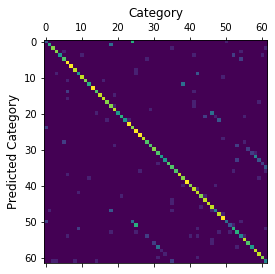

In [58]:
y_pred = model.predict_classes(X_test)

#Absolute matrix (number of guesses)
confMatrix = confusion_matrix(y_test, y_pred)
plt.matshow(confMatrix)
plt.ylabel('Predicted Category', fontsize=12)
plt.title('Category', fontsize=12)

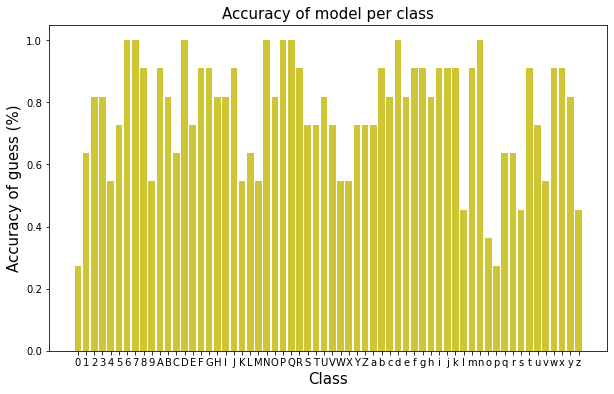

In [59]:
accGraph = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = (10,6))
plt.bar(CATEGORIES, [accGraph[i][i] for i in range(62)], color="#cec635")
plt.xlabel('Class',fontsize=15)
plt.ylabel('Accuracy of guess (%)',fontsize=15)
plt.title('Accuracy of model per class',fontsize=15)
plt.show()

### Hyper-Parameter Selection

#### Learning Rate

##### Model with 3 Convolutional Layers

In [27]:
#https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10
lrs=[]
acc_results = []
loss_results = []

learning_rate = 0.000125
while True:
    r1, r2, r3, r4 = cross_validation3Conv(learning_rate)
    
    epoch_accs = []
    epoch_losses = []
    for i in range(10):
        val_accuracy = (r1.history['val_accuracy'][i] + r2.history['val_accuracy'][i] + r3.history['val_accuracy'][i] + r4.history['val_accuracy'][i])/4
        val_loss = (r1.history['val_loss'][i] + r2.history['val_loss'][i] + r3.history['val_loss'][i] + r4.history['val_loss'][i])/4
        
        epoch_accs.append(val_accuracy)
        epoch_losses.append(val_loss)
    
    if epoch_losses[-1]>2.0:
        break

    lrs.append(learning_rate)
    acc_results.append(epoch_accs)
    loss_results.append(epoch_losses)
    learning_rate *= 2

print(lrs)
print(acc_results)
print(loss_results)

Epoch 1/10
64/64 [==============================] - 2s 20ms/step - loss: 4.1198 - accuracy: 0.0239 - val_loss: 4.0947 - val_accuracy: 0.0425
Epoch 2/10
64/64 [==============================] - 1s 23ms/step - loss: 4.0641 - accuracy: 0.0567 - val_loss: 4.0164 - val_accuracy: 0.1202
Epoch 3/10
64/64 [==============================] - 1s 17ms/step - loss: 3.8944 - accuracy: 0.2077 - val_loss: 3.7365 - val_accuracy: 0.2507
Epoch 4/10
64/64 [==============================] - 1s 17ms/step - loss: 3.3292 - accuracy: 0.3509 - val_loss: 2.9465 - val_accuracy: 0.3827
Epoch 5/10
64/64 [==============================] - 1s 17ms/step - loss: 2.2623 - accuracy: 0.5450 - val_loss: 2.1098 - val_accuracy: 0.4765
Epoch 6/10
64/64 [==============================] - 1s 17ms/step - loss: 1.5092 - accuracy: 0.6354 - val_loss: 1.6768 - val_accuracy: 0.5499
Epoch 7/10
64/64 [==============================] - 1s 17ms/step - loss: 1.2063 - accuracy: 0.6779 - val_loss: 1.5550 - val_accuracy: 0.5411
Epoch 8/10
64

64/64 [==============================] - 1s 18ms/step - loss: 0.6505 - accuracy: 0.7947 - val_loss: 1.0537 - val_accuracy: 0.7258
Epoch 6/10
64/64 [==============================] - 1s 17ms/step - loss: 0.5470 - accuracy: 0.8289 - val_loss: 1.0001 - val_accuracy: 0.7390
Epoch 7/10
64/64 [==============================] - 1s 17ms/step - loss: 0.4139 - accuracy: 0.8671 - val_loss: 0.9653 - val_accuracy: 0.7463
Epoch 8/10
64/64 [==============================] - 1s 17ms/step - loss: 0.3596 - accuracy: 0.8861 - val_loss: 0.9846 - val_accuracy: 0.7478
Epoch 9/10
64/64 [==============================] - 1s 17ms/step - loss: 0.3117 - accuracy: 0.9003 - val_loss: 0.9776 - val_accuracy: 0.7405
Epoch 10/10
64/64 [==============================] - 1s 17ms/step - loss: 0.2514 - accuracy: 0.9189 - val_loss: 0.9884 - val_accuracy: 0.7654
Epoch 1/10
64/64 [==============================] - 2s 20ms/step - loss: 3.7460 - accuracy: 0.1334 - val_loss: 2.4430 - val_accuracy: 0.3724
Epoch 2/10
64/64 [=====

Epoch 1/10
64/64 [==============================] - 2s 20ms/step - loss: 2.9115 - accuracy: 0.2791 - val_loss: 1.4986 - val_accuracy: 0.5792
Epoch 2/10
64/64 [==============================] - 1s 16ms/step - loss: 0.9569 - accuracy: 0.7038 - val_loss: 0.9960 - val_accuracy: 0.7258
Epoch 3/10
64/64 [==============================] - 1s 17ms/step - loss: 0.5759 - accuracy: 0.8001 - val_loss: 0.9032 - val_accuracy: 0.7493
Epoch 4/10
64/64 [==============================] - 1s 17ms/step - loss: 0.3802 - accuracy: 0.8749 - val_loss: 0.8951 - val_accuracy: 0.7625
Epoch 5/10
64/64 [==============================] - 1s 16ms/step - loss: 0.2961 - accuracy: 0.9018 - val_loss: 0.9181 - val_accuracy: 0.7625
Epoch 6/10
64/64 [==============================] - 1s 17ms/step - loss: 0.2567 - accuracy: 0.9135 - val_loss: 0.9275 - val_accuracy: 0.7654
Epoch 7/10
64/64 [==============================] - 1s 17ms/step - loss: 0.1871 - accuracy: 0.9335 - val_loss: 0.8906 - val_accuracy: 0.7830
Epoch 8/10
64

64/64 [==============================] - 1s 18ms/step - loss: 4.1352 - accuracy: 0.0127 - val_loss: 4.1274 - val_accuracy: 0.0161
Epoch 10/10
64/64 [==============================] - 1s 18ms/step - loss: 4.1352 - accuracy: 0.0078 - val_loss: 4.1274 - val_accuracy: 0.0161
Epoch 1/10
64/64 [==============================] - 2s 21ms/step - loss: 4.1864 - accuracy: 0.0083 - val_loss: 4.1273 - val_accuracy: 0.0161
Epoch 2/10
64/64 [==============================] - 1s 19ms/step - loss: 4.1351 - accuracy: 0.0132 - val_loss: 4.1274 - val_accuracy: 0.0161
Epoch 3/10
64/64 [==============================] - 1s 19ms/step - loss: 4.1343 - accuracy: 0.0103 - val_loss: 4.1274 - val_accuracy: 0.0161
Epoch 4/10
64/64 [==============================] - 1s 19ms/step - loss: 4.1351 - accuracy: 0.0068 - val_loss: 4.1273 - val_accuracy: 0.0161
Epoch 5/10
64/64 [==============================] - 1s 20ms/step - loss: 4.1352 - accuracy: 0.0132 - val_loss: 4.1274 - val_accuracy: 0.0161
Epoch 6/10
64/64 [=====

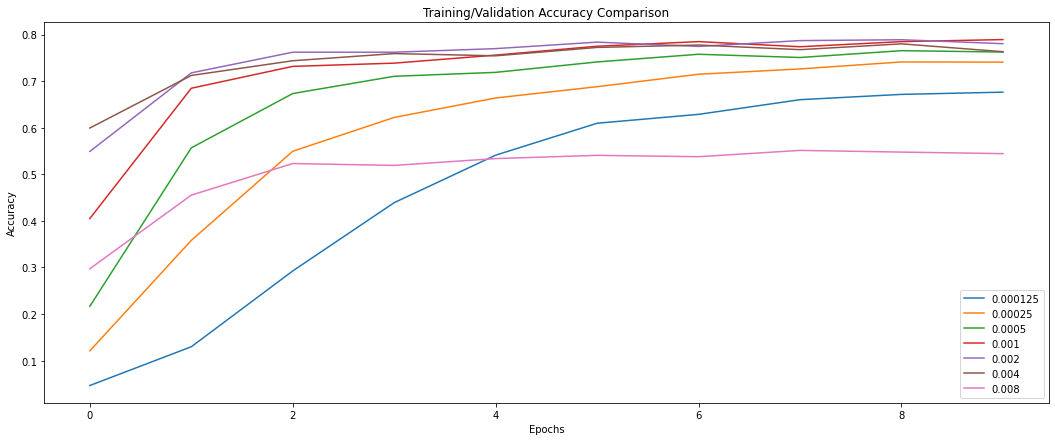

In [28]:
plt.figure(figsize = (18,7))
for r in acc_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(lrs)
plt.title("Training/Validation Accuracy Comparison")
plt.show()

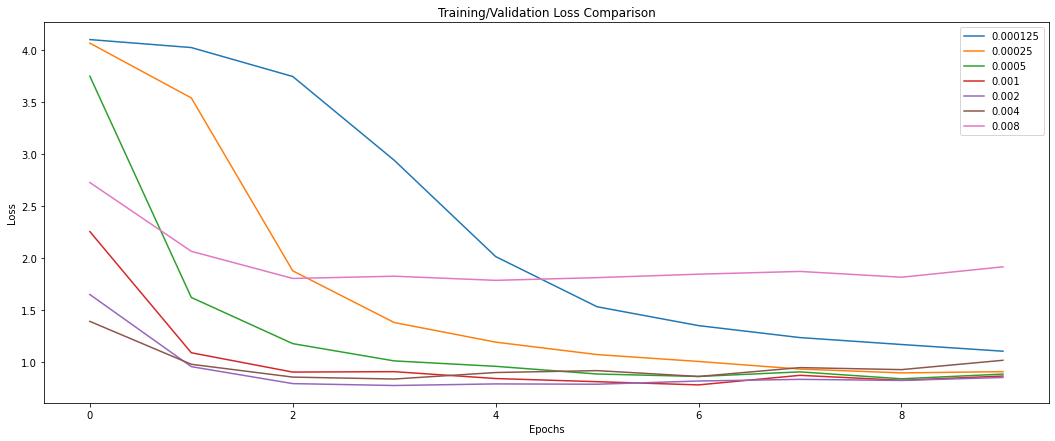

In [29]:
plt.figure(figsize = (18,7))
for r in loss_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(lrs)
plt.title("Training/Validation Loss Comparison")
plt.show()

##### Model with 2 Convolutional Layers

In [30]:
#https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10
lrs=[]
acc_results = []
loss_results = []

learning_rate = 0.000125
while True:
    r1, r2, r3, r4 = cross_validation2Conv(learning_rate)
    
    epoch_accs = []
    epoch_losses = []
    for i in range(10):
        val_accuracy = (r1.history['val_accuracy'][i] + r2.history['val_accuracy'][i] + r3.history['val_accuracy'][i] + r4.history['val_accuracy'][i])/4
        val_loss = (r1.history['val_loss'][i] + r2.history['val_loss'][i] + r3.history['val_loss'][i] + r4.history['val_loss'][i])/4
        
        epoch_accs.append(val_accuracy)
        epoch_losses.append(val_loss)
    
    if epoch_losses[-1]>2.0:
        break

    lrs.append(learning_rate)
    acc_results.append(epoch_accs)
    loss_results.append(epoch_losses)
    learning_rate *= 2

print(lrs)
print(acc_results)
print(loss_results)

Epoch 1/10
64/64 [==============================] - 6s 78ms/step - loss: 4.1035 - accuracy: 0.0298 - val_loss: 4.0146 - val_accuracy: 0.1745
Epoch 2/10
64/64 [==============================] - 5s 75ms/step - loss: 3.6656 - accuracy: 0.1808 - val_loss: 2.7564 - val_accuracy: 0.4194
Epoch 3/10
64/64 [==============================] - 5s 75ms/step - loss: 2.0926 - accuracy: 0.4638 - val_loss: 1.6363 - val_accuracy: 0.5718
Epoch 4/10
64/64 [==============================] - 5s 77ms/step - loss: 1.3356 - accuracy: 0.6149 - val_loss: 1.3958 - val_accuracy: 0.6144
Epoch 5/10
64/64 [==============================] - 5s 76ms/step - loss: 1.0401 - accuracy: 0.6960 - val_loss: 1.3239 - val_accuracy: 0.6232
Epoch 6/10
64/64 [==============================] - 5s 75ms/step - loss: 0.8799 - accuracy: 0.7414 - val_loss: 1.2007 - val_accuracy: 0.6701
Epoch 7/10
64/64 [==============================] - 5s 76ms/step - loss: 0.7964 - accuracy: 0.7639 - val_loss: 1.2369 - val_accuracy: 0.6481
Epoch 8/10
64

64/64 [==============================] - 5s 77ms/step - loss: 0.4580 - accuracy: 0.8436 - val_loss: 0.7761 - val_accuracy: 0.7727
Epoch 10/10
64/64 [==============================] - 5s 78ms/step - loss: 0.4096 - accuracy: 0.8587 - val_loss: 0.7815 - val_accuracy: 0.7801
Epoch 1/10
64/64 [==============================] - 6s 81ms/step - loss: 4.0064 - accuracy: 0.0440 - val_loss: 3.2698 - val_accuracy: 0.3534
Epoch 2/10
64/64 [==============================] - 5s 76ms/step - loss: 2.3554 - accuracy: 0.3935 - val_loss: 1.2727 - val_accuracy: 0.6349
Epoch 3/10
64/64 [==============================] - 5s 74ms/step - loss: 1.3408 - accuracy: 0.6271 - val_loss: 0.9254 - val_accuracy: 0.7038
Epoch 4/10
64/64 [==============================] - 5s 74ms/step - loss: 1.0448 - accuracy: 0.6940 - val_loss: 0.8217 - val_accuracy: 0.7610
Epoch 5/10
64/64 [==============================] - 5s 77ms/step - loss: 0.8491 - accuracy: 0.7390 - val_loss: 0.7765 - val_accuracy: 0.7698
Epoch 6/10
64/64 [=====

64/64 [==============================] - 5s 78ms/step - loss: 0.5315 - accuracy: 0.8226 - val_loss: 0.6447 - val_accuracy: 0.8050
Epoch 6/10
64/64 [==============================] - 5s 86ms/step - loss: 0.4970 - accuracy: 0.8348 - val_loss: 0.6023 - val_accuracy: 0.7962
Epoch 7/10
64/64 [==============================] - 5s 79ms/step - loss: 0.4060 - accuracy: 0.8597 - val_loss: 0.7105 - val_accuracy: 0.7962
Epoch 8/10
64/64 [==============================] - 5s 73ms/step - loss: 0.4034 - accuracy: 0.8539 - val_loss: 0.5695 - val_accuracy: 0.7962
Epoch 9/10
64/64 [==============================] - 5s 75ms/step - loss: 0.3157 - accuracy: 0.8856 - val_loss: 0.5909 - val_accuracy: 0.8152
Epoch 10/10
64/64 [==============================] - 5s 74ms/step - loss: 0.3406 - accuracy: 0.8754 - val_loss: 0.6149 - val_accuracy: 0.8226
Epoch 1/10
64/64 [==============================] - 6s 78ms/step - loss: 3.2843 - accuracy: 0.1945 - val_loss: 1.7309 - val_accuracy: 0.5132
Epoch 2/10
64/64 [=====

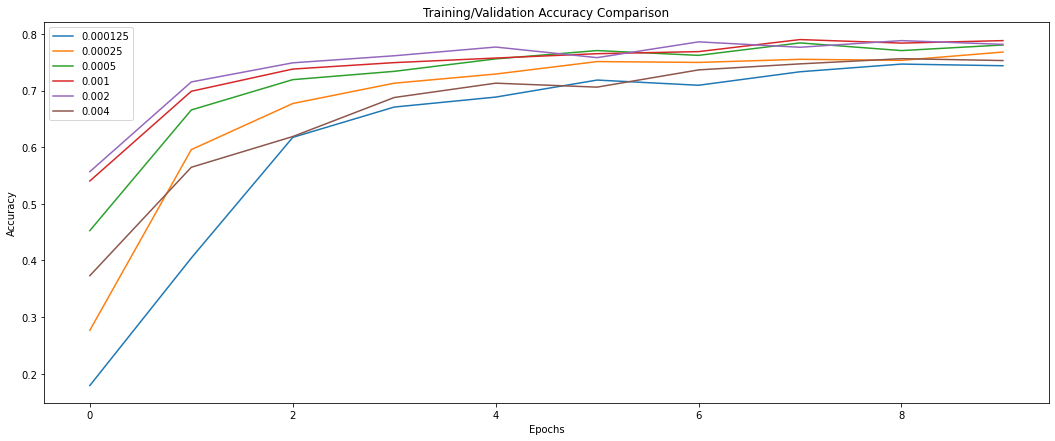

In [31]:
plt.figure(figsize = (18,7))
for r in acc_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(lrs)
plt.title("Training/Validation Accuracy Comparison")
plt.show()

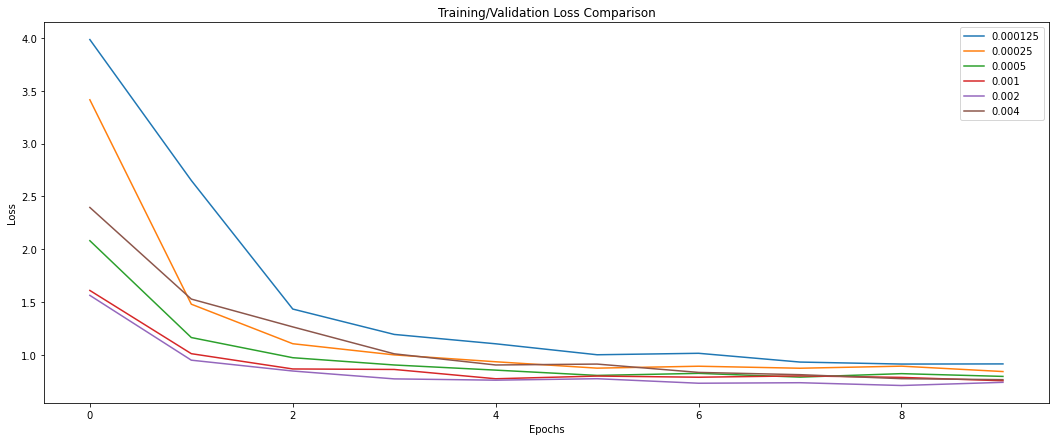

In [32]:
plt.figure(figsize = (18,7))
for r in loss_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(lrs)
plt.title("Training/Validation Loss Comparison")
plt.show()

#### Kernel Size

##### Model with 2 Convolutional Networks

In [33]:
kss=[]
acc_results = []
loss_results = []

kernel_size = 1
while kernel_size<32:
    try:
        r1, r2, r3, r4 = cross_validation3Conv(kernel_size=kernel_size)
    except:
        break
    
    epoch_accs = []
    epoch_losses = []
    for i in range(10):
        val_accuracy = (r1.history['val_accuracy'][i] + r2.history['val_accuracy'][i] + r3.history['val_accuracy'][i] + r4.history['val_accuracy'][i])/4
        val_loss = (r1.history['val_loss'][i] + r2.history['val_loss'][i] + r3.history['val_loss'][i] + r4.history['val_loss'][i])/4
        
        epoch_accs.append(val_accuracy)
        epoch_losses.append(val_loss)
    
    if epoch_losses[-1]>2.0:
        break

    kss.append(kernel_size)
    acc_results.append(epoch_accs)
    loss_results.append(epoch_losses)
    kernel_size +=1

print(kss)
print(acc_results)
print(loss_results)

Epoch 1/10
64/64 [==============================] - 2s 20ms/step - loss: 4.1115 - accuracy: 0.0288 - val_loss: 3.9965 - val_accuracy: 0.1114
Epoch 2/10
64/64 [==============================] - 1s 18ms/step - loss: 3.0974 - accuracy: 0.2698 - val_loss: 2.2474 - val_accuracy: 0.4018
Epoch 3/10
64/64 [==============================] - 1s 17ms/step - loss: 1.6492 - accuracy: 0.5367 - val_loss: 1.9024 - val_accuracy: 0.4619
Epoch 4/10
64/64 [==============================] - 1s 17ms/step - loss: 1.2971 - accuracy: 0.6178 - val_loss: 1.6966 - val_accuracy: 0.5293
Epoch 5/10
64/64 [==============================] - 1s 17ms/step - loss: 1.1189 - accuracy: 0.6667 - val_loss: 1.6621 - val_accuracy: 0.5308
Epoch 6/10
64/64 [==============================] - 1s 17ms/step - loss: 1.0114 - accuracy: 0.6940 - val_loss: 1.5715 - val_accuracy: 0.5528
Epoch 7/10
64/64 [==============================] - 1s 18ms/step - loss: 0.9133 - accuracy: 0.7195 - val_loss: 1.5460 - val_accuracy: 0.5704ccuracy: 0.
Ep

Epoch 9/10
64/64 [==============================] - 1s 17ms/step - loss: 0.2032 - accuracy: 0.9389 - val_loss: 0.6979 - val_accuracy: 0.8123
Epoch 10/10
64/64 [==============================] - 1s 17ms/step - loss: 0.1741 - accuracy: 0.9487 - val_loss: 0.6609 - val_accuracy: 0.7991
Epoch 1/10
64/64 [==============================] - 2s 21ms/step - loss: 3.7260 - accuracy: 0.1369 - val_loss: 2.0854 - val_accuracy: 0.4487
Epoch 2/10
64/64 [==============================] - 1s 16ms/step - loss: 1.4151 - accuracy: 0.6065 - val_loss: 1.0364 - val_accuracy: 0.6862
Epoch 3/10
64/64 [==============================] - 1s 18ms/step - loss: 0.8507 - accuracy: 0.7424 - val_loss: 0.8700 - val_accuracy: 0.7331
Epoch 4/10
64/64 [==============================] - 1s 17ms/step - loss: 0.6198 - accuracy: 0.8021 - val_loss: 0.6728 - val_accuracy: 0.7947
Epoch 5/10
64/64 [==============================] - 1s 17ms/step - loss: 0.4469 - accuracy: 0.8441 - val_loss: 0.6779 - val_accuracy: 0.7845
Epoch 6/10
6

64/64 [==============================] - 1s 17ms/step - loss: 0.3569 - accuracy: 0.8773 - val_loss: 0.9968 - val_accuracy: 0.7243
Epoch 8/10
64/64 [==============================] - 1s 18ms/step - loss: 0.3176 - accuracy: 0.9018 - val_loss: 0.9706 - val_accuracy: 0.7287
Epoch 9/10
64/64 [==============================] - 1s 18ms/step - loss: 0.2793 - accuracy: 0.8978 - val_loss: 0.8987 - val_accuracy: 0.7713
Epoch 10/10
64/64 [==============================] - 1s 18ms/step - loss: 0.2023 - accuracy: 0.9335 - val_loss: 1.0560 - val_accuracy: 0.7434
Epoch 1/10
64/64 [==============================] - 2s 22ms/step - loss: 4.0008 - accuracy: 0.0538 - val_loss: 3.1608 - val_accuracy: 0.1774
Epoch 2/10
64/64 [==============================] - 1s 20ms/step - loss: 2.1438 - accuracy: 0.4096 - val_loss: 2.0181 - val_accuracy: 0.4457
Epoch 3/10
64/64 [==============================] - 1s 19ms/step - loss: 1.3364 - accuracy: 0.5914 - val_loss: 1.8123 - val_accuracy: 0.4941
Epoch 4/10
64/64 [=====

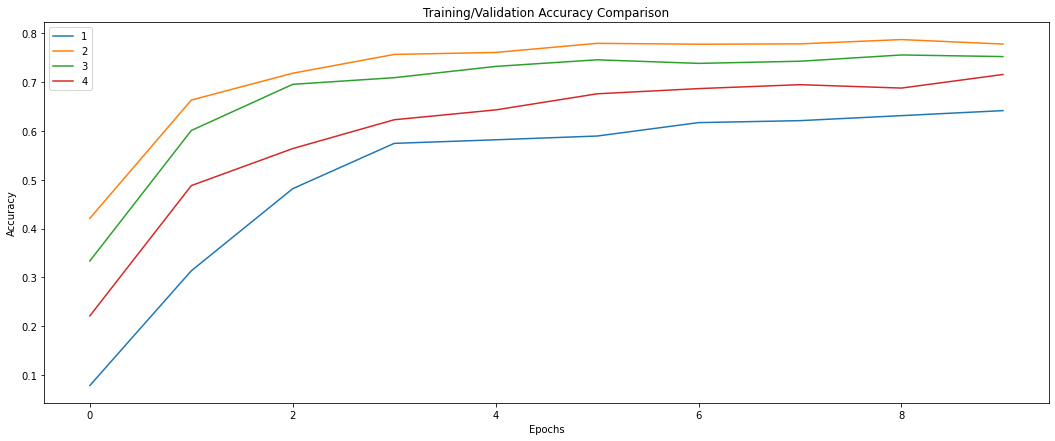

In [34]:
plt.figure(figsize = (18,7))
for r in acc_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(kss)
plt.title("Training/Validation Accuracy Comparison")
plt.show()

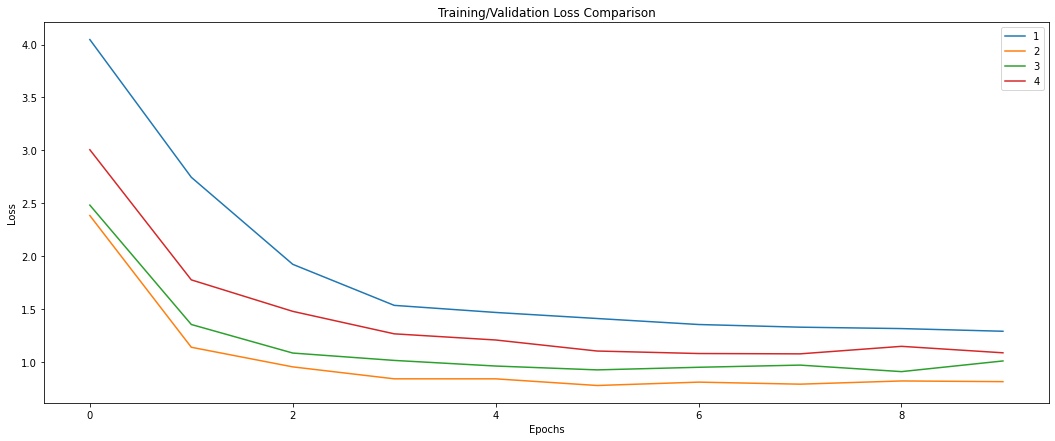

In [35]:
plt.figure(figsize = (18,7))
for r in loss_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(kss)
plt.title("Training/Validation Loss Comparison")
plt.show()

##### Model with 2 Convolutional Network

In [36]:
kss=[]
acc_results = []
loss_results = []

kernel_size = 1
while kernel_size<32:
    try:
        r1, r2, r3, r4 = cross_validation2Conv(kernel_size=kernel_size)
    except:
        break
    
    epoch_accs = []
    epoch_losses = []
    for i in range(10):
        val_accuracy = (r1.history['val_accuracy'][i] + r2.history['val_accuracy'][i] + r3.history['val_accuracy'][i] + r4.history['val_accuracy'][i])/4
        val_loss = (r1.history['val_loss'][i] + r2.history['val_loss'][i] + r3.history['val_loss'][i] + r4.history['val_loss'][i])/4
        
        epoch_accs.append(val_accuracy)
        epoch_losses.append(val_loss)
    
    if epoch_losses[-1]>2.0:
        break

    kss.append(kernel_size)
    acc_results.append(epoch_accs)
    loss_results.append(epoch_losses)
    kernel_size +=1

print(kss)
print(acc_results)
print(loss_results)

Epoch 1/10
64/64 [==============================] - 5s 57ms/step - loss: 3.5178 - accuracy: 0.1496 - val_loss: 2.1932 - val_accuracy: 0.4003
Epoch 2/10
64/64 [==============================] - 4s 56ms/step - loss: 1.4897 - accuracy: 0.5733 - val_loss: 1.4588 - val_accuracy: 0.5792
Epoch 3/10
64/64 [==============================] - 3s 53ms/step - loss: 1.0129 - accuracy: 0.6882 - val_loss: 1.2007 - val_accuracy: 0.6320
Epoch 4/10
64/64 [==============================] - 3s 54ms/step - loss: 0.7955 - accuracy: 0.7493 - val_loss: 1.1098 - val_accuracy: 0.6848
Epoch 5/10
64/64 [==============================] - 4s 55ms/step - loss: 0.7104 - accuracy: 0.7742 - val_loss: 1.1751 - val_accuracy: 0.6628
Epoch 6/10
64/64 [==============================] - 3s 52ms/step - loss: 0.5796 - accuracy: 0.8060 - val_loss: 1.1655 - val_accuracy: 0.6408
Epoch 7/10
64/64 [==============================] - 3s 53ms/step - loss: 0.5359 - accuracy: 0.8157 - val_loss: 1.1807 - val_accuracy: 0.6745
Epoch 8/10
64

64/64 [==============================] - 4s 59ms/step - loss: 0.2288 - accuracy: 0.9208 - val_loss: 0.8503 - val_accuracy: 0.7830
Epoch 10/10
64/64 [==============================] - 4s 56ms/step - loss: 0.1809 - accuracy: 0.9379 - val_loss: 0.7343 - val_accuracy: 0.8021
Epoch 1/10
64/64 [==============================] - 4s 58ms/step - loss: 3.3928 - accuracy: 0.1808 - val_loss: 1.7513 - val_accuracy: 0.5015
Epoch 2/10
64/64 [==============================] - 4s 56ms/step - loss: 1.4106 - accuracy: 0.5904 - val_loss: 1.1425 - val_accuracy: 0.6569
Epoch 3/10
64/64 [==============================] - 4s 59ms/step - loss: 0.9088 - accuracy: 0.7312 - val_loss: 0.8897 - val_accuracy: 0.7258
Epoch 4/10
64/64 [==============================] - 4s 58ms/step - loss: 0.6623 - accuracy: 0.7805 - val_loss: 0.8043 - val_accuracy: 0.7566
Epoch 5/10
64/64 [==============================] - 4s 59ms/step - loss: 0.5020 - accuracy: 0.8358 - val_loss: 0.7372 - val_accuracy: 0.7815
Epoch 6/10
64/64 [=====

Epoch 5/10
64/64 [==============================] - 5s 83ms/step - loss: 0.6190 - accuracy: 0.7879 - val_loss: 0.6168 - val_accuracy: 0.8109
Epoch 6/10
64/64 [==============================] - 5s 80ms/step - loss: 0.4834 - accuracy: 0.8343 - val_loss: 0.7166 - val_accuracy: 0.7830
Epoch 7/10
64/64 [==============================] - 5s 79ms/step - loss: 0.4159 - accuracy: 0.8578 - val_loss: 0.6684 - val_accuracy: 0.7815
Epoch 8/10
64/64 [==============================] - 5s 79ms/step - loss: 0.3986 - accuracy: 0.8602 - val_loss: 0.6875 - val_accuracy: 0.8035
Epoch 9/10
64/64 [==============================] - 5s 80ms/step - loss: 0.3702 - accuracy: 0.8778 - val_loss: 0.6168 - val_accuracy: 0.8065
Epoch 10/10
64/64 [==============================] - 5s 78ms/step - loss: 0.3282 - accuracy: 0.8734 - val_loss: 0.6788 - val_accuracy: 0.7903
Epoch 1/10
64/64 [==============================] - 6s 86ms/step - loss: 3.4372 - accuracy: 0.1745 - val_loss: 1.7163 - val_accuracy: 0.5249
Epoch 2/10
6

64/64 [==============================] - 6s 92ms/step - loss: 0.9853 - accuracy: 0.6808 - val_loss: 1.0152 - val_accuracy: 0.7126
Epoch 4/10
64/64 [==============================] - 6s 99ms/step - loss: 0.7521 - accuracy: 0.7576 - val_loss: 0.8873 - val_accuracy: 0.7537
Epoch 5/10
64/64 [==============================] - 6s 98ms/step - loss: 0.6595 - accuracy: 0.7869 - val_loss: 0.7852 - val_accuracy: 0.7801
Epoch 6/10
64/64 [==============================] - 6s 92ms/step - loss: 0.5510 - accuracy: 0.8113 - val_loss: 0.8309 - val_accuracy: 0.7610
Epoch 7/10
64/64 [==============================] - 6s 92ms/step - loss: 0.4801 - accuracy: 0.8338 - val_loss: 0.8280 - val_accuracy: 0.7639
Epoch 8/10
64/64 [==============================] - 6s 89ms/step - loss: 0.4546 - accuracy: 0.8426 - val_loss: 0.8154 - val_accuracy: 0.7757
Epoch 9/10
64/64 [==============================] - 5s 83ms/step - loss: 0.4051 - accuracy: 0.8558 - val_loss: 0.7330 - val_accuracy: 0.7991
Epoch 10/10
64/64 [=====

64/64 [==============================] - 7s 93ms/step - loss: 3.6482 - accuracy: 0.1080 - val_loss: 2.2544 - val_accuracy: 0.4208
Epoch 2/10
64/64 [==============================] - 5s 85ms/step - loss: 2.0317 - accuracy: 0.4409 - val_loss: 1.1545 - val_accuracy: 0.6290
Epoch 3/10
64/64 [==============================] - 5s 85ms/step - loss: 1.4526 - accuracy: 0.5679 - val_loss: 0.9556 - val_accuracy: 0.7023
Epoch 4/10
64/64 [==============================] - 6s 88ms/step - loss: 1.1566 - accuracy: 0.6447 - val_loss: 0.8665 - val_accuracy: 0.7229
Epoch 5/10
64/64 [==============================] - 6s 92ms/step - loss: 0.9942 - accuracy: 0.6799 - val_loss: 0.6763 - val_accuracy: 0.7786
Epoch 6/10
64/64 [==============================] - 5s 84ms/step - loss: 0.8057 - accuracy: 0.7326 - val_loss: 0.6272 - val_accuracy: 0.7757
Epoch 7/10
64/64 [==============================] - 5s 84ms/step - loss: 0.7290 - accuracy: 0.7561 - val_loss: 0.6808 - val_accuracy: 0.7727
Epoch 8/10
64/64 [======

64/64 [==============================] - 5s 84ms/step - loss: 0.8199 - accuracy: 0.7302 - val_loss: 1.0374 - val_accuracy: 0.6730
Epoch 8/10
64/64 [==============================] - 5s 80ms/step - loss: 0.7113 - accuracy: 0.7595 - val_loss: 0.9692 - val_accuracy: 0.6921
Epoch 9/10
64/64 [==============================] - 5s 71ms/step - loss: 0.6374 - accuracy: 0.7766 - val_loss: 0.9704 - val_accuracy: 0.7038
Epoch 10/10
64/64 [==============================] - 5s 71ms/step - loss: 0.5981 - accuracy: 0.7884 - val_loss: 1.0537 - val_accuracy: 0.6833
Epoch 1/10
64/64 [==============================] - 5s 74ms/step - loss: 4.0224 - accuracy: 0.0288 - val_loss: 3.2894 - val_accuracy: 0.1657
Epoch 2/10
64/64 [==============================] - 5s 73ms/step - loss: 2.9532 - accuracy: 0.2175 - val_loss: 2.1045 - val_accuracy: 0.4003
Epoch 3/10
64/64 [==============================] - 5s 71ms/step - loss: 2.2304 - accuracy: 0.3773 - val_loss: 1.4916 - val_accuracy: 0.5762
Epoch 4/10
64/64 [=====

64/64 [==============================] - 3s 48ms/step - loss: 3.3506 - accuracy: 0.1261 - val_loss: 2.9291 - val_accuracy: 0.2229
Epoch 4/10
64/64 [==============================] - 3s 44ms/step - loss: 2.7110 - accuracy: 0.2273 - val_loss: 2.3225 - val_accuracy: 0.3446
Epoch 5/10
64/64 [==============================] - 3s 47ms/step - loss: 2.2953 - accuracy: 0.3289 - val_loss: 2.1751 - val_accuracy: 0.3871
Epoch 6/10
64/64 [==============================] - 3s 43ms/step - loss: 2.0018 - accuracy: 0.4091 - val_loss: 1.8981 - val_accuracy: 0.4340
Epoch 7/10
64/64 [==============================] - 3s 45ms/step - loss: 1.8420 - accuracy: 0.4462 - val_loss: 1.8038 - val_accuracy: 0.4619
Epoch 8/10
64/64 [==============================] - 3s 44ms/step - loss: 1.7176 - accuracy: 0.4624 - val_loss: 1.6264 - val_accuracy: 0.5191
Epoch 9/10
64/64 [==============================] - 3s 41ms/step - loss: 1.5476 - accuracy: 0.4927 - val_loss: 1.5124 - val_accuracy: 0.5601
Epoch 10/10
64/64 [=====

64/64 [==============================] - 1s 22ms/step - loss: 3.0527 - accuracy: 0.1281 - val_loss: 2.6943 - val_accuracy: 0.3079
Epoch 10/10
64/64 [==============================] - 2s 26ms/step - loss: 2.9843 - accuracy: 0.1427 - val_loss: 2.6136 - val_accuracy: 0.3343
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[[0.41972140967845917, 0.6257331371307373, 0.6693548262119293, 0.7085777223110199, 0.7074780166149139, 0.7122433930635452, 0.7214076220989227, 0.7342375367879868, 0.7349706739187241, 0.7536657005548477], [0.508064515888691, 0.65285924077034, 0.7199413478374481, 0.73607037961483, 0.747067466378212, 0.7470674365758896, 0.7580645233392715, 0.7540322542190552, 0.7485337257385254, 0.7723607122898102], [0.5271260961890221, 0.6909824162721634, 0.7294721305370331, 0.7496334314346313, 0.7573313862085342, 0.769428163766861, 0.7727272808551788, 0.7774926722049713, 0.7635630518198013, 0.7679618895053864], [0.5751466304063797, 0.6961143612861633, 0.7397360652685165, 0.747800588607

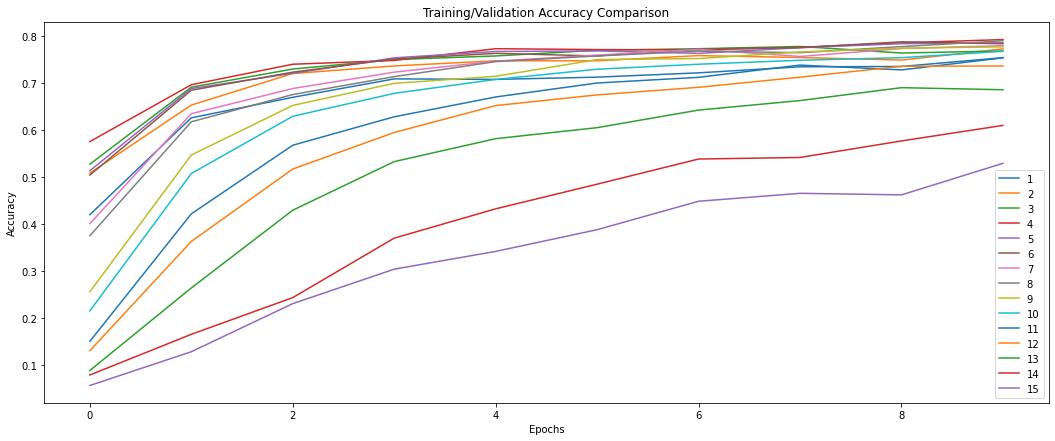

In [37]:
plt.figure(figsize = (18,7))
for r in acc_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(kss)
plt.title("Training/Validation Accuracy Comparison")
plt.show()

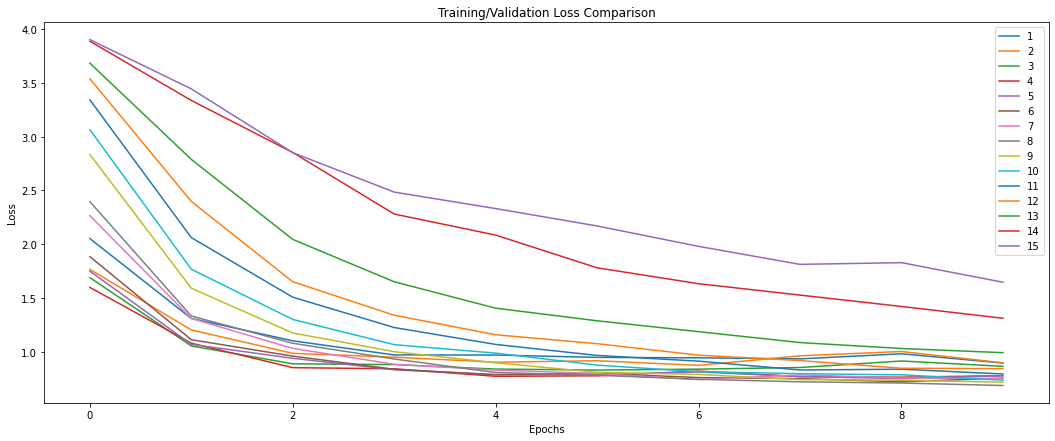

In [38]:
plt.figure(figsize = (18,7))
for r in loss_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(kss)
plt.title("Training/Validation Loss Comparison")
plt.show()

#### Dropout

In [39]:
dropouts=[]
acc_results = []
loss_results = []

dropout = 0.1
while dropout<1.0:
    try:
        r1, r2, r3, r4 = cross_validation2Conv(dropout=dropout)
    except:
        break
    
    epoch_accs = []
    epoch_losses = []
    for i in range(10):
        val_accuracy = (r1.history['val_accuracy'][i] + r2.history['val_accuracy'][i] + r3.history['val_accuracy'][i] + r4.history['val_accuracy'][i])/4
        val_loss = (r1.history['val_loss'][i] + r2.history['val_loss'][i] + r3.history['val_loss'][i] + r4.history['val_loss'][i])/4
        
        epoch_accs.append(val_accuracy)
        epoch_losses.append(val_loss)

    dropouts.append(dropout)
    acc_results.append(epoch_accs)
    loss_results.append(epoch_losses)
    dropout +=0.1

print(dropouts)
print(acc_results)
print(loss_results)

Epoch 1/10
64/64 [==============================] - 7s 88ms/step - loss: 2.7046 - accuracy: 0.3338 - val_loss: 1.6835 - val_accuracy: 0.5279
Epoch 2/10
64/64 [==============================] - 6s 89ms/step - loss: 0.8946 - accuracy: 0.7385 - val_loss: 1.1355 - val_accuracy: 0.6833
Epoch 3/10
64/64 [==============================] - 6s 92ms/step - loss: 0.4794 - accuracy: 0.8485 - val_loss: 1.1924 - val_accuracy: 0.6657
Epoch 4/10
64/64 [==============================] - 6s 90ms/step - loss: 0.3402 - accuracy: 0.8920 - val_loss: 0.9966 - val_accuracy: 0.7243
Epoch 5/10
64/64 [==============================] - 6s 89ms/step - loss: 0.2538 - accuracy: 0.9140 - val_loss: 1.0352 - val_accuracy: 0.7273
Epoch 6/10
64/64 [==============================] - 6s 91ms/step - loss: 0.1920 - accuracy: 0.9301 - val_loss: 1.2284 - val_accuracy: 0.7009
Epoch 7/10
64/64 [==============================] - 6s 87ms/step - loss: 0.1602 - accuracy: 0.9438 - val_loss: 1.1766 - val_accuracy: 0.7067
Epoch 8/10
64

64/64 [==============================] - 5s 82ms/step - loss: 0.1179 - accuracy: 0.9629 - val_loss: 0.7663 - val_accuracy: 0.8035
Epoch 10/10
64/64 [==============================] - 5s 82ms/step - loss: 0.0877 - accuracy: 0.9673 - val_loss: 0.8407 - val_accuracy: 0.8065
Epoch 1/10
64/64 [==============================] - 6s 86ms/step - loss: 2.8972 - accuracy: 0.2825 - val_loss: 1.3104 - val_accuracy: 0.6261
Epoch 2/10
64/64 [==============================] - 5s 83ms/step - loss: 1.0464 - accuracy: 0.6828 - val_loss: 0.8499 - val_accuracy: 0.7625
Epoch 3/10
64/64 [==============================] - 5s 83ms/step - loss: 0.6362 - accuracy: 0.7928 - val_loss: 0.7079 - val_accuracy: 0.7977
Epoch 4/10
64/64 [==============================] - 5s 82ms/step - loss: 0.4204 - accuracy: 0.8553 - val_loss: 0.7092 - val_accuracy: 0.8006
Epoch 5/10
64/64 [==============================] - 5s 82ms/step - loss: 0.3041 - accuracy: 0.8935 - val_loss: 0.6530 - val_accuracy: 0.8138
Epoch 6/10
64/64 [=====

64/64 [==============================] - 5s 78ms/step - loss: 0.5217 - accuracy: 0.8270 - val_loss: 0.6741 - val_accuracy: 0.7786
Epoch 6/10
64/64 [==============================] - 5s 82ms/step - loss: 0.4213 - accuracy: 0.8607 - val_loss: 0.6458 - val_accuracy: 0.7845
Epoch 7/10
64/64 [==============================] - 5s 81ms/step - loss: 0.3676 - accuracy: 0.8803 - val_loss: 0.7291 - val_accuracy: 0.7889
Epoch 8/10
64/64 [==============================] - 5s 82ms/step - loss: 0.3341 - accuracy: 0.8812 - val_loss: 0.6859 - val_accuracy: 0.7962
Epoch 9/10
64/64 [==============================] - 5s 82ms/step - loss: 0.2686 - accuracy: 0.9003 - val_loss: 0.6728 - val_accuracy: 0.7991
Epoch 10/10
64/64 [==============================] - 5s 85ms/step - loss: 0.2477 - accuracy: 0.9140 - val_loss: 0.7237 - val_accuracy: 0.7977
Epoch 1/10
64/64 [==============================] - 6s 81ms/step - loss: 3.4570 - accuracy: 0.1618 - val_loss: 1.6866 - val_accuracy: 0.5191
Epoch 2/10
64/64 [=====

64/64 [==============================] - 6s 85ms/step - loss: 4.1426 - accuracy: 0.0191 - val_loss: 4.1095 - val_accuracy: 0.1378
Epoch 2/10
64/64 [==============================] - 5s 81ms/step - loss: 3.9153 - accuracy: 0.0679 - val_loss: 2.9402 - val_accuracy: 0.3182
Epoch 3/10
64/64 [==============================] - 5s 82ms/step - loss: 2.9166 - accuracy: 0.2317 - val_loss: 1.8386 - val_accuracy: 0.5308
Epoch 4/10
64/64 [==============================] - 5s 83ms/step - loss: 2.2816 - accuracy: 0.3671 - val_loss: 1.4765 - val_accuracy: 0.6070
Epoch 5/10
64/64 [==============================] - 5s 82ms/step - loss: 1.9397 - accuracy: 0.4433 - val_loss: 1.1491 - val_accuracy: 0.6921
Epoch 6/10
64/64 [==============================] - 5s 82ms/step - loss: 1.8055 - accuracy: 0.4624 - val_loss: 1.0423 - val_accuracy: 0.7126
Epoch 7/10
64/64 [==============================] - 5s 82ms/step - loss: 1.6154 - accuracy: 0.5235 - val_loss: 0.9461 - val_accuracy: 0.7346
Epoch 8/10
64/64 [======

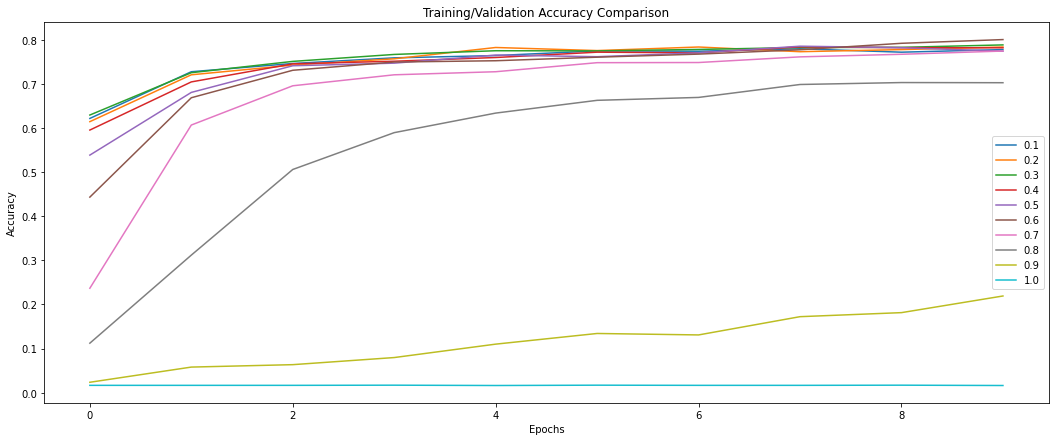

In [42]:
plt.figure(figsize = (18,7))
for r in acc_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend([round(x, 1) for x in dropouts])
plt.title("Training/Validation Accuracy Comparison")
plt.show()

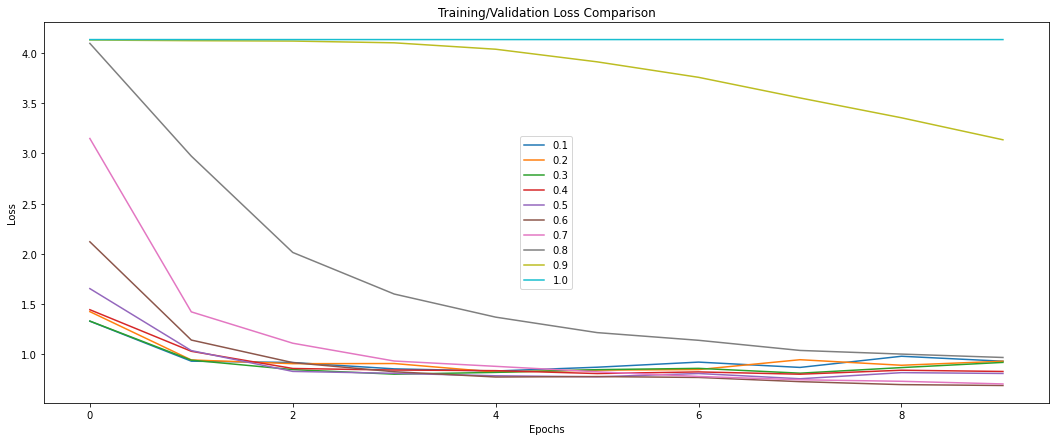

In [43]:
plt.figure(figsize = (18,7))
for r in loss_results:
    plt.plot(range(10), r)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend([round(x, 1) for x in dropouts])
plt.title("Training/Validation Loss Comparison")
plt.show()